In [1]:
from PIL import Image
from starvector.model.starvector_arch import StarVectorForCausalLM
from starvector.data.util import process_and_rasterize_svg
import torch

#model_name = "starvector/starvector-1b-im2svg"
model_name = "starvector/starvector-8b-im2svg"

#starvector = StarVectorForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16)
starvector = StarVectorForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16
)

starvector.cuda()
starvector.eval()


[2025-05-14 01:54:37,707] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)


You are attempting to use Flash Attention 2.0 with a model not initialized on GPU. Make sure to move the model to GPU after initializing it on CPU with `model.to('cuda')`.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


trainable params: 0 || all params: 7507080192 || trainable%: 0.0


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

StarVectorForCausalLM(
  (model): StarVectorStarCoder2(
    (svg_transformer): StarCoderModel(
      (transformer): Starcoder2ForCausalLM(
        (model): Starcoder2Model(
          (embed_tokens): Embedding(49157, 4608)
          (layers): ModuleList(
            (0-31): 32 x Starcoder2DecoderLayer(
              (self_attn): Starcoder2Attention(
                (q_proj): Linear(in_features=4608, out_features=4608, bias=True)
                (k_proj): Linear(in_features=4608, out_features=512, bias=True)
                (v_proj): Linear(in_features=4608, out_features=512, bias=True)
                (o_proj): Linear(in_features=4608, out_features=4608, bias=True)
              )
              (mlp): Starcoder2MLP(
                (c_fc): Linear(in_features=4608, out_features=18432, bias=True)
                (c_proj): Linear(in_features=18432, out_features=4608, bias=True)
                (act): PytorchGELUTanh()
              )
              (input_layernorm): LayerNorm((4608,), eps=

In [ ]:
image_pil = Image.open('assets/examples/sample-0.png')
image = starvector.process_images([image_pil])[0].cuda()
if not image.shape[0] == 1:
    image = image.squeeze(0)
batch = {"image": image}

raw_svg = starvector.generate_im2svg(batch, max_length=1000000)[0]
svg, raster_image = process_and_rasterize_svg(raw_svg)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


In [20]:
raw_svg = starvector.generate_im2svg(batch, max_length=1000)[0]

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


In [21]:
print(raw_svg)

<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" viewBox="0 0 1000 1000">
  <defs>
    <style>
     .cls-1 {
        fill: none;
      }

     .cls-2 {
        clip-path: url(#clip-path);
      }

     .cls-3 {
        fill: #252c40;
      }

     .cls-4 {
        fill: #fff;
      }

     .cls-5 {
        fill: #272d41;
      }

     .cls-6 {
        fill: #262d41;
      }

     .cls-7 {
        fill: #262d41;
      }

     .cls-8 {
        fill: #262d41;
      }

     .cls-9 {
        fill: #262d41;
      }

     .cls-10 {
        fill: #262d41;
      }

     .cls-11 {
        fill: #262d41;
      }

     .cls-12 {
        fill: #262d41;
      }

     .cls-13 {
        fill: #262d41;
      }

     .cls-14 {
        fill: #262d41;
      }

     .cls-15 {
        fill: #262d41;
      }

     .cls-16 {
        fill: #262d41;
      }

     .cls-17 {
        fill: #262d41;
      }

     .cls-18 {
        fill: #262d41;
      }

     .cls-19 {
        fill

In [10]:
# 在生成SVG后，打印其内容以检查是否真的为空  
print(f"SVG内容长度: {len(raw_svg)}")  
print(raw_svg[:200])  # 打印SVG开头部分

SVG内容长度: 647
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" viewBox="0 0 1010 250"><defs><style>.cls-1{fill:none;}.cls-2{clip-path:url(#clip-path);}.cls-3{fill:#252c40;}</style>


In [11]:
print(svg)

<svg></svg>


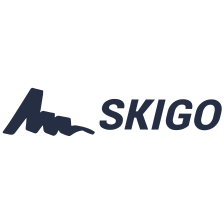

In [12]:
from IPython.display import SVG, display

display(image_pil)



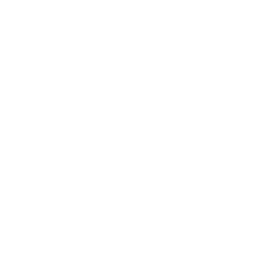

In [13]:
display(SVG(svg))
display(raster_image)

In [3]:
#image_pil = Image.open('../assets/examples/sample-18.png')
# 检查图像是否正确加载  
image_pil = Image.open('./pic2.png')  
print(f"图像模式: {image_pil.mode}, 图像大小: {image_pil.size}")  
# 转换为RGB并继续处理  
image_pil = image_pil.convert('RGB')  
image = starvector.process_images([image_pil])[0].cuda()
batch = {"image": image}

raw_svg = starvector.generate_im2svg(batch, max_length=10000)[0]
svg, raster_image = process_and_rasterize_svg(raw_svg)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


图像模式: RGBA, 图像大小: (1705, 855)


KeyboardInterrupt: 

In [ ]:
from IPython.display import SVG, display

display(image_pil)
display(SVG(svg))
display(raster_image)

In [ ]:
display(image_pil)

In [ ]:
display(SVG(svg))

In [ ]:
display(raster_image)

In [18]:
del starvector
torch.cuda.empty_cache()